# CNN practice 

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
import numpy as np

In [127]:
mnist = np.load('mnist.npz')

In [128]:
mnist.files

['x_test', 'x_train', 'y_train', 'y_test']

In [129]:
(x_train, y_train),(x_test,y_test)  = (mnist['x_train'],mnist['y_train']),(mnist['x_test'],mnist['y_test'])

In [130]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


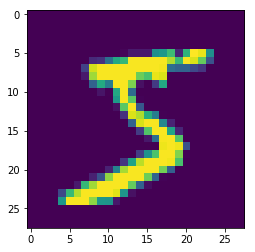

In [131]:
# look at one image frorm train data
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

In [132]:
x_train[0].shape

(28, 28)

# prepare the data to fit into shape required

In [133]:
x_train= x_train.reshape(60000,28,28,1).astype('float32')
x_test= x_test.reshape(10000,28,28,1).astype('float32')
input_shape = (28,28,1)  # shape of on image

In [134]:
from keras.utils.np_utils import to_categorical

# one hot encoded using on target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [135]:
print(y_train.shape)
print(y_test.shape)


(60000, 10)
(10000, 10)


# build a model using a simple cnn

In [136]:
from keras.models import Sequential
from keras.layers import Activation,Dense, Conv2D, MaxPooling2D, Flatten

In [137]:
model = Sequential()

model.add(Conv2D(64, activation='relu', input_shape=(28,28,1), kernel_size=3))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


# compiling the model

In [138]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [139]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                108170    
Total params: 108,810
Trainable params: 108,810
Non-trainable params: 0
_________________________________________________________________


# training 

In [140]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=3, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 56s - loss: 7.5513 - acc: 0.5263 - val_loss: 5.4023 - val_acc: 0.6608
Epoch 2/3
60000/60000 [==============================] - 57s - loss: 4.1202 - acc: 0.7352 - val_loss: 0.2070 - val_acc: 0.9540
Epoch 3/3
60000/60000 [==============================] - 55s - loss: 0.1061 - acc: 0.9702 - val_loss: 0.0881 - val_acc: 0.9736


# make a predicton

In [141]:
x_test.shape

(10000, 28, 28, 1)

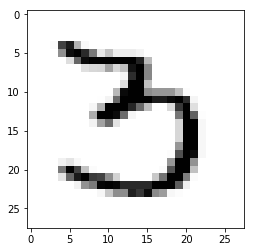

In [145]:
x_test_sample = x_test[780,:]
plt.imshow(x_test_sample.reshape(28,28), cmap=plt.cm.Greys);

In [144]:
model.predict_classes(x_test[[780],:])

1/1 [==============================] - 0s


array([3])

# evaluation

In [153]:
y_test.shape

(10000, 10)

In [160]:
result= model.evaluate(x_test,y_test)

 9984/10000 [============================>.] - ETA: 0s

In [161]:
print(model.metrics_names)

['loss', 'acc']


In [162]:
print(result)

[0.08814676996418275, 0.9736]
